In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def lemmatize(s):
    tokens = word_tokenize(s.lower())
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return set(lemmatized)

s1 = "What you do defines you"
s2 = "Your deeds define you"

set1 = lemmatize(s1)
set2 = lemmatize(s2)

jaccard = len(set1.intersection(set2)) / len(set1.union(set2))
jaccard


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0.0

In [5]:
def lev_dist(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1
    dist = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        new_dist = [i2 + 1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                new_dist.append(dist[i1])
            else:
                new_dist.append(1 + min((dist[i1], dist[i1 + 1], new_dist[-1])))
        dist = new_dist
    return dist[-1]

sentence1 = "I cannot believe what he said"
senrence2 = "I believe it is not what he said"

dist = lev_dist(s1, s2)
print(" The two strings has Levenshtein distance of:", dist)


 The two strings has Levenshtein distance of: 15


In [6]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter, defaultdict

# Open and read the file
file = open("/content/Europe_Covid.txt", "r")
text = file.read()
file.close()

# Prepare for processing
stop_words = set(stopwords.words("english"))
tokens = word_tokenize(text.lower())
words = [word for word in tokens if word.isalnum() and word not in stop_words]

# Lemmatize words
lemmatizer = WordNetLemmatizer()
lem_words = [lemmatizer.lemmatize(word) for word in words]

# Define window size for context
window_size = 5
context = defaultdict(list)

# Collect context words around 'government' and 'curfew'
for i, word in enumerate(lem_words):
    if word == 'government' or word == 'curfew':
        start = max(0, i - window_size)
        end = min(len(lem_words), i + window_size + 1)
        context_words = lem_words[start:i] + lem_words[i+1:end]
        context[word].extend(context_words)

# Count and print common context words
gov_freq = Counter(context['government'])
curfew_freq = Counter(context['curfew'])

print("Common words near 'government':", gov_freq.most_common(5))
print("Common words near 'curfew':", curfew_freq.most_common(5))


Common words near 'government': [('visit', 1), ('health', 1), ('center', 1), ('macron', 1), ('added', 1)]
Common words near 'curfew': [('day', 2), ('region', 2), ('andalusia', 2), ('also', 2), ('million', 1)]


In [8]:
from textblob import TextBlob
file = open("/content/Europe_Covid.txt", "r", encoding='utf-8')
text = file.read()
file.close()

blob = TextBlob(text)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print("Sentiment:", polarity)
print("Subjectivity:", subjectivity)


Sentiment: 0.04992382294707877
Subjectivity: 0.3476432095036746


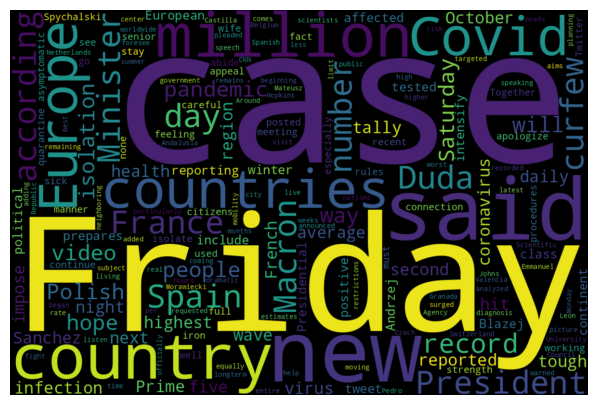

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

with open("Europe_Covid.txt", "r", encoding='utf-8') as file:
    text = file.read()

wordcloud = WordCloud(width=1200, height=800, background_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
pip install sumy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 17.3 MB/s eta 0:00:00
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21693 sha256=e87ad2ecb74f151a5a24e8b32d5b1a494d1e3759c70a06fd91fba174604bb187
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=bd87667e70a725e0e7324f7c2fd88333df6f1044ddb0d3145fc7b18b948fbd60
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built breadability docopt


In [16]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
with open("Europe_Covid.txt", "r", encoding='utf-8') as file:
    text = file.read()
parser = PlaintextParser.from_string(text, Tokenizer('english'))
summarizer = Summarizer(Stemmer('english'))
summarizer.stop_words = get_stop_words('english')

summary = summarizer(parser.document, 5)

for sentence in summary:
    print(sentence)


European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class.
Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday.
Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began.
"When I listen to the scientists, and the Scientific Council, we foresee [living with the virus] at best until next summer," Macron said, speaking during a visit to a health center.
Spain's Prime Minister Pedro Sanchez pleaded with the public to limit their mobility and help fight a second wave, during a speech on Friday.


In [17]:
pip install transformers


In [20]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")

text = """
European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter. Those affected include Europe's political class. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda said that he was feeling well, was asymptomatic and would continue working in isolation. "As you can see, I am full of strength. I hope it will stay this way. However, the fact is that I must isolate. Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday. "I would like to apologize to all of those, who have to go through quarantine procedures in connection to meeting with me in recent days ... I hope none of you get sick." The Polish President used the video to appeal to people to be especially careful of senior citizens, as they were particularly at risk from Covid-19. Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began. The case tally was more than 50% higher than Monday's 7,482 cases. "The second wave has hit the entire Europe equally," Prime Minister Mateusz Morawiecki said Friday. The five countries with the highest rate of infection worldwide are all in Europe, according to Johns Hopkins University's latest moving averages, as analyzed by CNN. The worst-hit nations are the Czech Republic, Belgium, the Netherlands, Switzerland and France. In all five countries, the number of new infections has surged since the beginning of October. French President Emmanuel Macron warned Friday that his country needs to live with the virus in the long term. "When I listen to the scientists, and the Scientific Council, we foresee [living with the virus] at best until next summer," Macron said, speaking during a visit to a health center. Macron added that his government aims to impose new coronavirus restrictions in a targeted way. On the same day France reported 42,032 new cases in 24 hours, a new record, according to the French Health Agency. Around 46 million people in the country are subject to a night-time coronavirus curfew in France. The picture in neighboring Spain is less dramatic but the country's daily average remains high, remaining at 299 per million on October 19. Spain's Prime Minister Pedro Sanchez pleaded with the public to limit their mobility and help fight a second wave, during a speech on Friday. "The next few weeks, months will be tough, very tough," Sanchez said, adding that while Spain has officially recorded more than 1 million cases, he estimates the real number is more than 3 million. The Spanish regions of Castilla and Leon and Valencia have announced they are planning to impose a night curfew over the coming days. The region of Andalusia has also requested a curfew for the city of Granada.
"""

labels = ["informational", "query", "advocacy", "not informational"]

result = classifier(text, labels)

print("Content type of the text:", result["labels"][0], "with confidence", result["scores"][0])

info_status = "informational" if result["labels"][0] == "informational" else "not informational"
print("Is the given  text informational?", info_status)


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Content type of the text: informational with confidence 0.35738155245780945
Is the given  text informational? informational
